Build and Train The Models (RNN, LSTM, GRU)

In [103]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, RNN, SimpleRNN, LSTM, GRU, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Step 1: Read the dataset
file_path = "Upper West Side.csv" 
data = pd.read_csv(file_path)

# Step 2: Data preprocessing

# Select necessary features
selected_features = ['Orders', 'temperature_2m...C.', 'precipitation..mm.', 'rain..mm.', 'Friday', 'Saturday', 'Sunday', 'Monday', 
    'Tuesday', 'Wednesday', 'Thursday','hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
    'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
    'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23',
]

data = data[selected_features]

# Normalize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Normalize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Generate sequences
def create_sequences(data, target_column_index, n_steps=4):
    X, y = [], []
    for i in range(len(data) - n_steps):
        # Use all features for inputs
        X.append(data[i:i+n_steps])
        # Use only the target column ('Orders') for the output
        y.append(data[i+n_steps, target_column_index])
    return np.array(X), np.array(y)

# Define the target column index (0 corresponds to 'Orders')
target_column_index = 0
n_steps = 4  # Using the past 4 hours
output_steps = 1 

X, y = create_sequences(data_scaled, target_column_index, n_steps)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Build and train models
def build_model(model_type, input_shape):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(50, activation='relu', return_sequences=False, input_shape=input_shape))
    elif model_type == 'LSTM':
        model.add(LSTM(50, activation='relu', return_sequences=False, input_shape=input_shape))
    elif model_type == 'GRU':
        model.add(GRU(50, activation='relu', return_sequences=False, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(output_steps))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Define the input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Build models
rnn_model = build_model('RNN', input_shape)
lstm_model = build_model('LSTM', input_shape)
gru_model = build_model('GRU', input_shape)

# Step 6: Train the models
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train RNN
history_rnn = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Train LSTM
history_lstm = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Train GRU
history_gru = gru_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Step 7: Evaluate the models
rnn_loss, rnn_mae = rnn_model.evaluate(X_test, y_test, verbose=0)
lstm_loss, lstm_mae = lstm_model.evaluate(X_test, y_test, verbose=0)
gru_loss, gru_mae = gru_model.evaluate(X_test, y_test, verbose=0)

print(f"Model Evaluation Results:\nRNN: Loss={rnn_loss:.4f}, MAE={rnn_mae:.4f}\nLSTM: Loss={lstm_loss:.4f}, MAE={lstm_mae:.4f}\nGRU: Loss={gru_loss:.4f}, MAE={gru_mae:.4f}")

# Step 8: Choose the best model based on evaluation
best_model_type = min((rnn_mae, 'RNN'), (lstm_mae, 'LSTM'), (gru_mae, 'GRU'))[1]
print(f"The best model is: {best_model_type}")



Epoch 1/50


c:\Users\marya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.1558 - mae: 0.8459 - val_loss: 0.2834 - val_mae: 0.4205
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3950 - mae: 0.4982 - val_loss: 0.2552 - val_mae: 0.3953
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3104 - mae: 0.4377 - val_loss: 0.2438 - val_mae: 0.3803
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2966 - mae: 0.4258 - val_loss: 0.2513 - val_mae: 0.3903
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2642 - mae: 0.3965 - val_loss: 0.2525 - val_mae: 0.3917
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2713 - mae: 0.4080 - val_loss: 0.2270 - val_mae: 0.3675
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2540 - mae: 0.3870 - val_loss: 0.2394 - val_mae: 0.3806
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2514 - mae: 0.3934 - val_loss: 0.2284 - val_mae: 0.3684
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2425 

Prediction and Visualization 

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
RMSE Results:
RNN: 0.4719
LSTM: 0.4570
GRU: 0.4607
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R² Results:
RNN: 0.7317
LSTM: 0.7484
GRU: 0.7443
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


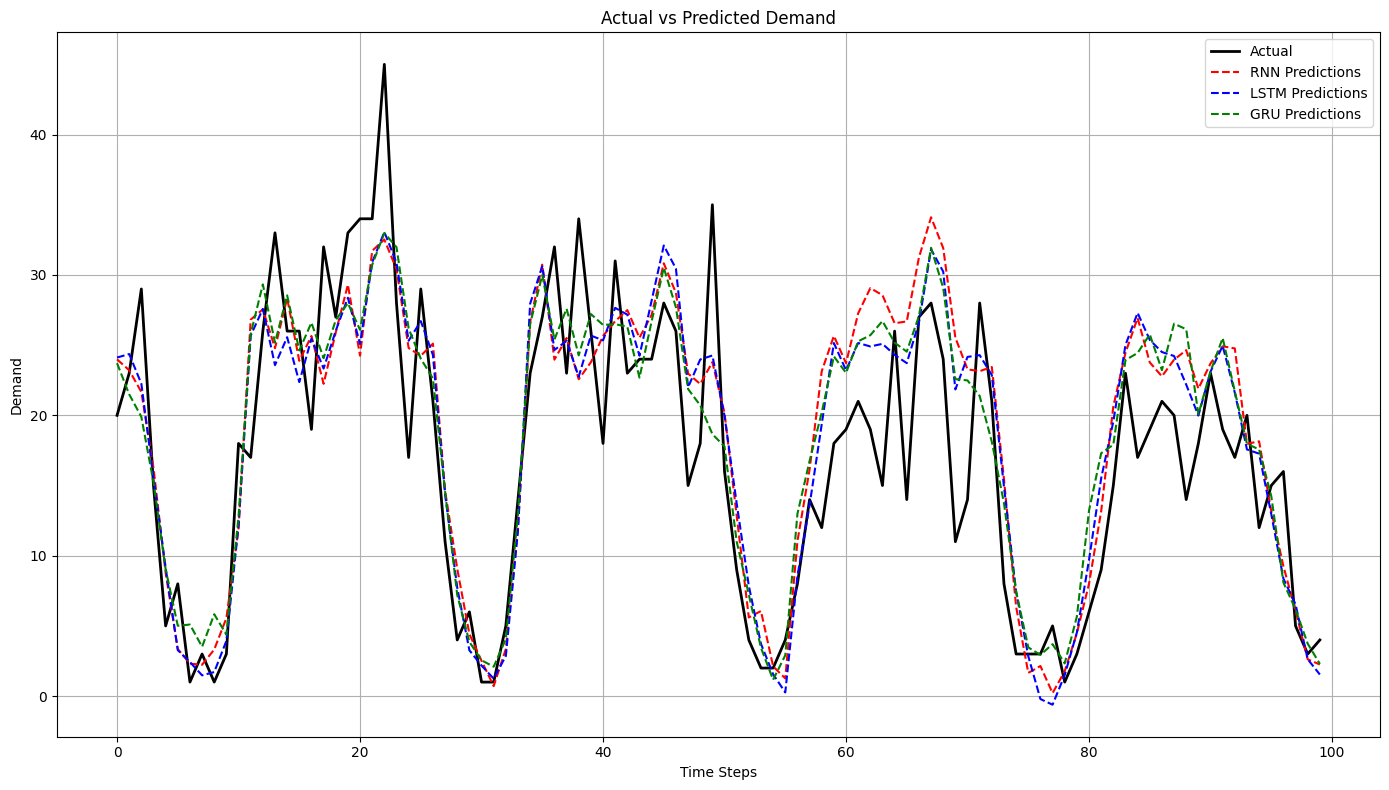

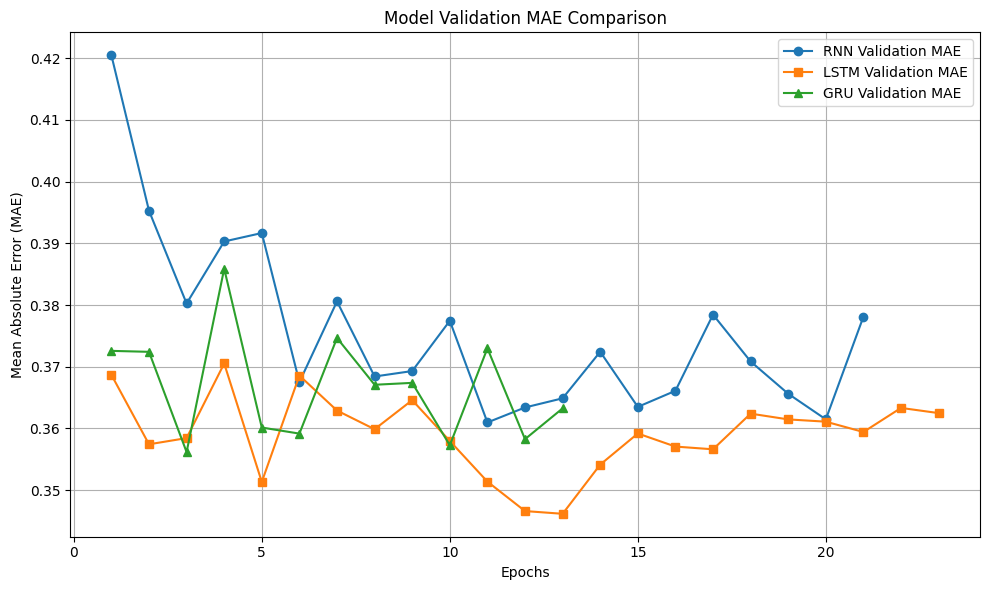

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

rnn_rmse = np.sqrt(mean_squared_error(y_test, rnn_model.predict(X_test)))
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_model.predict(X_test)))
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_model.predict(X_test)))

print(f"RMSE Results:\nRNN: {rnn_rmse:.4f}\nLSTM: {lstm_rmse:.4f}\nGRU: {gru_rmse:.4f}")

rnn_r2 = r2_score(y_test, rnn_model.predict(X_test))
lstm_r2 = r2_score(y_test, lstm_model.predict(X_test))
gru_r2 = r2_score(y_test, gru_model.predict(X_test))

print(f"R² Results:\nRNN: {rnn_r2:.4f}\nLSTM: {lstm_r2:.4f}\nGRU: {gru_r2:.4f}")

# prediction 
predicted_rnn = rnn_model.predict(X_test)
predicted_lstm = lstm_model.predict(X_test)
predicted_gru = gru_model.predict(X_test)

# Convert predictions back to original scale
predicted_rnn = scaler.inverse_transform(np.hstack([predicted_rnn, np.zeros((predicted_rnn.shape[0], data_scaled.shape[1] - 1))]))[:, target_column_index]
predicted_lstm = scaler.inverse_transform(np.hstack([predicted_lstm, np.zeros((predicted_lstm.shape[0], data_scaled.shape[1] - 1))]))[:, target_column_index]
predicted_gru = scaler.inverse_transform(np.hstack([predicted_gru, np.zeros((predicted_gru.shape[0], data_scaled.shape[1] - 1))]))[:, target_column_index]
y_test_original = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data_scaled.shape[1] - 1))]))[:, target_column_index]


# Plotting actual vs predicted values
plt.figure(figsize=(14, 8))
plt.plot(y_test_original[:100], label='Actual', color='black', linewidth=2)
plt.plot(predicted_rnn[:100], label='RNN Predictions', linestyle='--', color='red')
plt.plot(predicted_lstm[:100], label='LSTM Predictions', linestyle='--', color='blue')
plt.plot(predicted_gru[:100], label='GRU Predictions', linestyle='--', color='green')

plt.title('Actual vs Predicted Demand')
plt.xlabel('Time Steps')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plotting model performance
plt.figure(figsize=(10, 6))
epochs_rnn = range(1, len(history_rnn.history['loss']) + 1)
epochs_lstm = range(1, len(history_lstm.history['loss']) + 1)
epochs_gru = range(1, len(history_gru.history['loss']) + 1)

plt.plot(epochs_rnn, history_rnn.history['val_mae'], label='RNN Validation MAE', marker='o')
plt.plot(epochs_lstm, history_lstm.history['val_mae'], label='LSTM Validation MAE', marker='s')
plt.plot(epochs_gru, history_gru.history['val_mae'], label='GRU Validation MAE', marker='^')

plt.title('Model Validation MAE Comparison')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Saving Models 

In [105]:

gru_model.save('UWS_gru_model.keras')  # Save the GRU model

VISUALIZTION 

In [106]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import folium

# Load the trained models
models = {
    'Financial District': load_model('FinancialDistrict_gru_model.keras'),
    'Harlem': load_model('Harlem_gru_model.keras'),
    'Mid Town': load_model('MidTown_gru_model.keras'),
    'Upper East Side': load_model('UES_gru_model.keras'),
    'Upper West Side': load_model('UWS_gru_model.keras')
}

# Load data for each area directly from CSV files
data = {
    'Financial District': pd.read_csv('Financial District.csv').values,
    'Harlem': pd.read_csv('Harlem.csv').values,
    'Mid Town': pd.read_csv('Mid Town.csv').values,
    'Upper East Side': pd.read_csv('Upper East Side.csv').values,
    'Upper West Side': pd.read_csv('Upper West Side.csv').values
}



In [107]:

# Define the number of timesteps your model expects
timesteps = 4  # Adjust this to match your model's expected input
num_features = data['Financial District'].shape[1]  # Assuming all areas have the same number of features

# Reshape the data to match the model's expected input shape
reshaped_data = {}
for area, data_array in data.items():
    num_samples = data_array.shape[0] - timesteps + 1
    reshaped_data[area] = np.array([data_array[i:i+timesteps] for i in range(num_samples)])



In [122]:
# Make predictions
predictions = {}
for area, model in models.items():
    X = reshaped_data[area]  # Ensure X is the correct shape and preprocessed
    predictions[area] = model.predict(X)

# Example: Print predictions for each area
for area, prediction in predictions.items():
    print(f"{area}: {prediction[-1][0]:.2f} orders")

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Financial District: -12.51 orders
Harlem: -5.40 orders
Mid Town: -14.16 orders
Upper East Side: -3.71 orders
Upper West Side: -5.45 orders


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import folium

# Load the trained models
models = {
    'Financial District': load_model('FinancialDistrict_gru_model.keras'),
    'Harlem': load_model('Harlem_gru_model.keras'),
    'Mid Town': load_model('MidTown_gru_model.keras'),
    'Upper East Side': load_model('UES_gru_model.keras'),
    'Upper West Side': load_model('UWS_gru_model.keras')
}

# Load data for each area directly from CSV files
data = {
    'Financial District': pd.read_csv('Financial District.csv').values,
    'Harlem': pd.read_csv('Harlem.csv').values,
    'Mid Town': pd.read_csv('Mid Town.csv').values,
    'Upper East Side': pd.read_csv('Upper East Side.csv').values,
    'Upper West Side': pd.read_csv('Upper West Side.csv').values
}



In [109]:

# Define coordinates for each area
coordinates = {
    'Financial District': (40.7074, -74.0113),
    'Harlem': (40.8116, -73.9465),
    'Mid Town': (40.7549, -73.9840),
    'Upper East Side': (40.7736, -73.9566),
    'Upper West Side': (40.7870, -73.9754)
}

# Create a Folium map centered around New York City
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add markers for each area with demand predictions
for area, coords in coordinates.items():
    demand = predictions[area][-1][0]  # Get the latest prediction
    folium.CircleMarker(
        location=coords,
        radius=10,
        popup=f"{area}: {demand:.2f} orders",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Save the map to an HTML file
m.save('demand_predictions_map.html')

# Display the map in a Jupyter Notebook (if applicable)
m